In [1]:
#include <cstdlib>
#include <iostream>
#include <map>
#include <string>

#include "TChain.h"
#include "TFile.h"
#include "TTree.h"
#include "TString.h"
#include "TObjString.h"
#include "TSystem.h"
#include "TROOT.h"


#include "TMVA/Factory.h"
#include "TMVA/Tools.h"
#include "TMVA/DataLoader.h"

#include "TImage.h"
#include "TCanvas.h"
#include "TArrayD.h"
#include "TROOT.h"
#include "TColor.h"
#include "TAttImage.h"
#include "TEnv.h"

In [2]:
TMVA::Tools::Instance();

TString outfileName( "TMVAOutputVI.root" );
TFile* outputFile = TFile::Open( outfileName, "RECREATE" );

TMVA::Factory *factory = new TMVA::Factory( "TMVAClassification", outputFile,
                                               "!V:!ROC:SilentFile:!Correlations:Silent:Color:!DrawProgressBar:AnalysisType=Classification" );
TMVA::DataLoader *loader=new TMVA::DataLoader("mymc-dataset");

TFile *input = TFile::Open( "MyMCdataset.root");

In [3]:
loader->AddVariable( "var0", 'F' );
loader->AddVariable( "var1", 'F' );
loader->AddVariable( "var2", 'F' );
loader->AddVariable( "var3 := var0-var1", 'F' );
loader->AddVariable( "var4 := var0*var2", 'F' );
loader->AddVariable( "var5 := var1+var2", 'F' );

In [4]:
std::cout << "--- TMVAClassification       : Using input file: " << input->GetName() << std::endl;
   
// --- Register the training and test trees

TTree *tsignal     = (TTree*)input->Get("MyMCSig");
TTree *tbackground = (TTree*)input->Get("MyMCBkg");
   
Double_t signalWeight     = 1.0;
Double_t backgroundWeight = 1.0;
   
loader->AddSignalTree    ( tsignal,     signalWeight     );
loader->AddBackgroundTree( tbackground, backgroundWeight );   

TCut mycuts = ""; 
TCut mycutb = ""; 

loader->fSignalWeight=signalWeight;
loader->fBackgroundWeight=backgroundWeight;
loader->fTreeS=tsignal;
loader->fTreeB=tbackground;
loader->PrepareTrainingAndTestTree( mycuts, mycutb,
                                        "nTrain_Signal=3000:nTrain_Background=3000:nTest_Signal=1449:nTest_Background=1449:SplitMode=Random:NormMode=NumEvents:!V" );


--- TMVAClassification       : Using input file: MyMCdataset.root


## -1 default case

var0 = 9.573916 %
var1 = 21.795662 %
var2 = 29.613413 %
var0-var1 = 32.382202 %
var0*var2 = 1.542760 %
var1+var2 = 5.092041 %


Info in <TCanvas::Print>: gif file tmva_relative.gif has been created


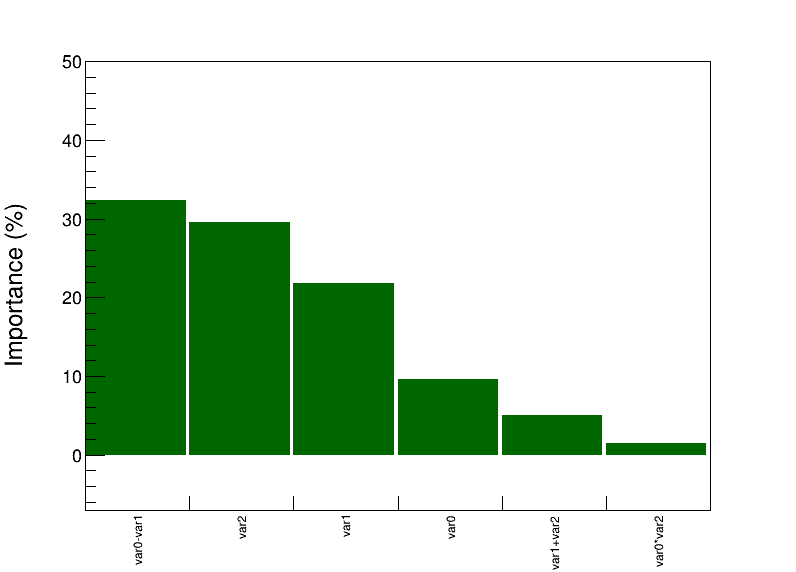

In [5]:

factory->EvaluateImportance(loader,-1,TMVA::Types::kBDT, "BDT","!V:NTrees=5:MinNodeSize=2.5%:MaxDepth=2:BoostType=AdaBoost:AdaBoostBeta=0.5:UseBaggedBoost:BaggedSampleFraction=0.5:SeparationType=GiniIndex:nCuts=20" );
   

// Save the output
outputFile->Close();

delete factory;
delete loader;